In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set de entrenamiento con el target Damage Grade includio
data_train = pd.read_csv('data/clean_Data.csv',dtype = {
    "building_id" : "int32",
    "geo_level_1_id" : "int8", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int8",
    "height_percentage" :"int8",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int8",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool",
    "damage_grade" : "category" 
                    
})

In [3]:
data_train.shape

(260601, 40)

In [4]:
data_train.size

10424040

In [5]:
data_train.describe(include="all")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00",260601,260601,...,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
unique,nan,nan,nan,nan,nan,nan,nan,nan,3,5,...,2,2,2,2,2,2,2,2,2,3
top,nan,nan,nan,nan,nan,nan,nan,nan,t,r,...,False,False,False,False,False,False,False,False,False,2
freq,nan,nan,nan,nan,nan,nan,nan,nan,216757,219196,...,251838,258490,260356,260507,260322,260552,260563,260578,259267,148259
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Set de Test
data_test = pd.read_csv('data/test_values.csv',dtype = {
    "building_id" : "int32",
    "geo_level_1_id" : "int8", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int8",
    "height_percentage" :"int8",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int8",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool",
})

In [7]:
data_test.shape

(86868, 39)

In [8]:
data_test.size

3387852

In [9]:
data_test.describe(include="all")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,"86,868.00","86,868.00","86,868.00","86,868.00","86,868.00","86,868.00","86,868.00","86,868.00",86868,86868,...,86868,86868,86868,86868,86868,86868,86868,86868,86868,86868
unique,nan,nan,nan,nan,nan,nan,nan,nan,3,5,...,2,2,2,2,2,2,2,2,2,2
top,nan,nan,nan,nan,nan,nan,nan,nan,t,r,...,False,False,False,False,False,False,False,False,False,False
freq,nan,nan,nan,nan,nan,nan,nan,nan,72180,73178,...,81300,83926,86152,86780,86836,86781,86859,86858,86864,86442
mean,"526,627.88",13.89,704.13,"6,261.76",2.13,26.55,8.01,5.44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"303,782.84",8.03,413.36,"3,648.71",0.73,73.41,4.38,1.91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"264,421.50",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"526,983.50",12.00,709.00,"6,276.00",2.00,15.00,7.00,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"789,084.25",21.00,"1,054.00","9,416.00",2.00,30.00,9.00,6.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   building_id                             86868 non-null  int32   
 1   geo_level_1_id                          86868 non-null  int8    
 2   geo_level_2_id                          86868 non-null  int16   
 3   geo_level_3_id                          86868 non-null  int16   
 4   count_floors_pre_eq                     86868 non-null  int8    
 5   age                                     86868 non-null  int16   
 6   area_percentage                         86868 non-null  int8    
 7   height_percentage                       86868 non-null  int8    
 8   land_surface_condition                  86868 non-null  category
 9   foundation_type                         86868 non-null  category
 10  roof_type                               86868 

In [11]:
#Analisis del set de test, para realizar limpieza de datos, verifica cantdad de nan.
data_test.isna().sum().sum()

0

In [12]:
#Analisis del set de test, para realizar limpieza de datos, verifica cantidad de null.
data_test.isnull().sum().sum()

0

In [13]:
data_train.iloc[:,-1]

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: category
Categories (3, object): ['1', '2', '3']

# Analisis de Correlacion y Feature Engineering

In [14]:
#En este analisis no entran las variables categoricas.
corr_matrix = data_train.corr()
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
geo_level_1_id,-0.00,1.00,-0.06,0.00,-0.09,-0.00,0.07,-0.06,-0.02,-0.15,...,-0.02,0.00,0.02,0.00,0.00,0.00,-0.00,0.00,0.00,-0.02
geo_level_2_id,0.00,-0.06,1.00,0.00,0.05,0.01,-0.05,0.04,0.02,0.08,...,0.02,-0.01,-0.03,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.01
geo_level_3_id,-0.00,0.00,0.00,1.00,-0.02,-0.01,-0.01,-0.02,-0.02,0.03,...,0.02,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
count_floors_pre_eq,-0.00,-0.09,0.05,-0.02,1.00,0.09,0.10,0.77,0.17,-0.03,...,-0.01,0.08,0.04,0.02,0.01,-0.00,0.01,0.01,0.00,-0.00
age,-0.00,-0.00,0.01,-0.01,0.09,1.00,-0.00,0.06,0.07,0.00,...,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
area_percentage,-0.00,0.07,-0.05,-0.01,0.10,-0.00,1.00,0.20,0.03,-0.23,...,-0.02,0.16,0.11,0.05,0.05,0.02,0.02,0.02,0.00,0.01
height_percentage,0.00,-0.06,0.04,-0.02,0.77,0.06,0.20,1.00,0.15,-0.11,...,-0.01,0.12,0.07,0.03,0.02,0.00,0.01,0.01,0.00,0.01
has_superstructure_adobe_mud,-0.00,-0.02,0.02,-0.02,0.17,0.07,0.03,0.15,1.00,-0.31,...,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01
has_superstructure_mud_mortar_stone,0.00,-0.15,0.08,0.03,-0.03,0.00,-0.23,-0.11,-0.31,1.00,...,0.06,-0.16,-0.12,-0.04,-0.02,-0.03,-0.01,-0.01,-0.00,0.01


Debo analizar las variables categoricas, ya que panda solo calcula correlacion de variables numericas. Aplico Hot Encoding para las siguientes columnas:

    -land_surface_condition: condición de la superficie terrestre donde el edificio fue construido. Valores posibles: n, o, t.
    -foundation_type: tipo de cimientos usados cuando se construyó la edificación. Valores posibles: h, i, r, u, w.
    -roof_type: tipo de techo usado cuando se construyó la edificación. Valores posibles: n, q, x.
    -ground_floor_type: tipo de construcción usado en la planta baja cuando se construyó la edificación. Valores posibles: f, m, v, x, z.
    -other_floor_type : tipo de construcción usado en otros pisos cuando se construyó la edificación (exceptuando el techo). Posibles valores: j, q, s, x.
    -position : orientación de la edificación. Posibles valores: j, o, s, t.
    -plan_configuration: formato de construcción de la edificación (para diseño sísmico). Valores posibles: a, c, d, f, m, n, o, q, s, u.
    -legal_ownership_status : estado legal de la tierra donde la edificación fue construida. Valores posibles: a, r, v, w.
    -damage grade= 1,2,3



In [15]:
# Aplico Hot Encoding de las variables categoricas para poder analizar correlacion.
data_corr = data_train.drop(["land_surface_condition",
                "foundation_type",
                "roof_type",
                "ground_floor_type",
                "other_floor_type",
                "position",
                "plan_configuration",
                "legal_ownership_status"], axis="columns")
data_corr

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,True,True,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,False,True,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,False,True,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,False,True,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,True,False,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,False,True,...,False,False,False,False,False,False,False,False,False,2
260597,669485,17,715,2060,2,0,6,5,False,True,...,False,False,False,False,False,False,False,False,False,3
260598,602512,17,51,8163,3,55,6,7,False,True,...,False,False,False,False,False,False,False,False,False,3
260599,151409,26,39,1851,2,10,14,6,False,False,...,False,False,False,False,False,False,False,False,False,2


In [16]:
#Land surface condition
data_corr["Superficie Tipo n"] = data_train["land_surface_condition"] == "n"
data_corr["Superficie Tipo o"] = data_train["land_surface_condition"] == "o"
data_corr["Superficie Tipo t"] = data_train["land_surface_condition"] == "t"

In [17]:
#Foundation Type
data_corr["Cimientos Tipo h"] = data_train["foundation_type"] == "h"
data_corr["Cimientos Tipo i"] = data_train["foundation_type"] == "i"
data_corr["Cimientos Tipo r"] = data_train["foundation_type"] == "r"
data_corr["Cimientos Tipo u"] = data_train["foundation_type"] == "u"
data_corr["Cimientos Tipo w"] = data_train["foundation_type"] == "w"

In [18]:
#Roof Type
data_corr["Techos Tipo n"] = data_train["roof_type"] == "n"
data_corr["Techos Tipo q"] = data_train["roof_type"] == "q"
data_corr["Techos Tipo x"] = data_train["roof_type"] == "x"

In [19]:
#Ground floor type
data_corr["Planta baja tipo f"] = data_train["ground_floor_type"] == "f"
data_corr["Planta baja tipo m"] = data_train["ground_floor_type"] == "m"
data_corr["Planta baja tipo v"] = data_train["ground_floor_type"] == "v"
data_corr["Planta baja tipo x"] = data_train["ground_floor_type"] == "x"
data_corr["Planta baja tipo z"] = data_train["ground_floor_type"] == "z"

In [20]:
#ohter floor type
data_corr["Contruccion de otros pisos tipo j"] = data_train["other_floor_type"] == "j"
data_corr["Contruccion de otros pisos tipo q"] = data_train["other_floor_type"] == "q"
data_corr["Contruccion de otros pisos tipo s"] = data_train["other_floor_type"] == "s"
data_corr["Contruccion de otros pisos tipo x"] = data_train["other_floor_type"] == "x"

In [21]:
#position
data_corr["Posicion j"] = data_train["position"] == "j"
data_corr["Posicion o"] = data_train["position"] == "o"
data_corr["Posicion s"] = data_train["position"] == "s"
data_corr["Posicion t"] = data_train["position"] == "t"

In [22]:
#plan configuration
data_corr["Construccion sismica tipo a"] = data_train["plan_configuration"] == "a"
data_corr["Construccion sismica tipo c"] = data_train["plan_configuration"] == "c"
data_corr["Construccion sismica tipo d"] = data_train["plan_configuration"] == "d"
data_corr["Construccion sismica tipo f"] = data_train["plan_configuration"] == "f"
data_corr["Construccion sismica tipo m"] = data_train["plan_configuration"] == "m"
data_corr["Construccion sismica tipo n"] = data_train["plan_configuration"] == "n"
data_corr["Construccion sismica tipo o"] = data_train["plan_configuration"] == "o"
data_corr["Construccion sismica tipo q"] = data_train["plan_configuration"] == "q"
data_corr["Construccion sismica tipo s"] = data_train["plan_configuration"] == "s"
data_corr["Construccion sismica tipo u"] = data_train["plan_configuration"] == "u"


In [23]:
#legal ownership status
data_corr["Estado legal tipo a"] = data_train["legal_ownership_status"] == "a"
data_corr["Estado legal tipo r"] = data_train["legal_ownership_status"] == "r"
data_corr["Estado legal tipo v"] = data_train["legal_ownership_status"] == "v"
data_corr["Estado legal tipo w"] = data_train["legal_ownership_status"] == "w"

In [24]:
#damage grade
data_corr["Low Damage"] = data_train["damage_grade"] == "1"
data_corr["Medium Damage"] = data_train["damage_grade"] == "2"
data_corr["High Damage"] = data_train["damage_grade"] == "3"

In [25]:
data_corr

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,Construccion sismica tipo q,Construccion sismica tipo s,Construccion sismica tipo u,Estado legal tipo a,Estado legal tipo r,Estado legal tipo v,Estado legal tipo w,Low Damage,Medium Damage,High Damage
0,802906,6,487,12198,2,30,6,5,True,True,...,False,False,False,False,False,True,False,False,False,True
1,28830,8,900,2812,2,10,8,7,False,True,...,False,False,False,False,False,True,False,False,True,False
2,94947,21,363,8973,2,10,5,5,False,True,...,False,False,False,False,False,True,False,False,False,True
3,590882,22,418,10694,2,10,6,5,False,True,...,False,False,False,False,False,True,False,False,True,False
4,201944,11,131,1488,3,30,8,9,True,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,False,True,...,True,False,False,False,False,True,False,False,True,False
260597,669485,17,715,2060,2,0,6,5,False,True,...,False,False,False,False,False,True,False,False,False,True
260598,602512,17,51,8163,3,55,6,7,False,True,...,False,False,False,False,False,True,False,False,False,True
260599,151409,26,39,1851,2,10,14,6,False,False,...,False,False,False,False,False,True,False,False,True,False


In [26]:
corr_matrix = data_corr.corr()
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,Construccion sismica tipo q,Construccion sismica tipo s,Construccion sismica tipo u,Estado legal tipo a,Estado legal tipo r,Estado legal tipo v,Estado legal tipo w,Low Damage,Medium Damage,High Damage
building_id,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
geo_level_1_id,-0.00,1.00,-0.06,0.00,-0.09,-0.00,0.07,-0.06,-0.02,-0.15,...,0.01,0.01,0.03,0.10,0.01,-0.08,0.00,0.14,-0.08,-0.01
geo_level_2_id,0.00,-0.06,1.00,0.00,0.05,0.01,-0.05,0.04,0.02,0.08,...,-0.00,-0.01,-0.03,-0.03,-0.03,0.02,0.01,-0.04,-0.01,0.03
geo_level_3_id,-0.00,0.00,0.00,1.00,-0.02,-0.01,-0.01,-0.02,-0.02,0.03,...,0.00,-0.00,0.00,0.03,-0.00,-0.02,-0.01,0.00,-0.01,0.01
count_floors_pre_eq,-0.00,-0.09,0.05,-0.02,1.00,0.09,0.10,0.77,0.17,-0.03,...,-0.03,-0.00,-0.00,-0.10,-0.01,0.07,0.01,-0.13,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Estado legal tipo v,0.00,-0.08,0.02,-0.02,0.07,0.02,0.03,0.06,-0.00,0.13,...,-0.01,-0.00,-0.02,-0.75,-0.38,1.00,-0.52,-0.06,0.02,0.02
Estado legal tipo w,-0.00,0.00,0.01,-0.01,0.01,0.00,-0.00,0.00,0.03,-0.00,...,-0.00,-0.00,0.00,-0.01,-0.01,-0.52,1.00,-0.02,-0.02,0.03
Low Damage,0.00,0.14,-0.04,0.00,-0.13,-0.04,0.13,-0.05,-0.07,-0.32,...,0.02,0.01,0.05,0.09,0.01,-0.06,-0.02,1.00,-0.38,-0.23
Medium Damage,-0.00,-0.08,-0.01,-0.01,0.00,0.01,0.00,-0.00,0.02,0.02,...,-0.03,0.01,0.02,-0.00,-0.01,0.02,-0.02,-0.38,1.00,-0.81


In [27]:
columns_for_correlation = data_corr.columns.to_list()
columns_for_correlation.remove('building_id')
columns_for_correlation.remove('Low Damage')
columns_for_correlation.remove('Medium Damage')
columns_for_correlation.remove('High Damage')
columns_for_correlation.remove('damage_grade')

In [28]:
#Correlacion entre Variable y Low Damage

low_damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    low_correlation = data_corr[[col, 'Low Damage']].corr()
    low_damage_correlation.loc[len(low_damage_correlation)] = [col, low_correlation.min().min()]

low_damage_correlation = low_damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
low_damage_correlation.abs().nlargest(20,"correlation")

,correlation
colum_name,
Cimientos Tipo r,0.37
Planta baja tipo v,0.35
Cimientos Tipo i,0.33
Techos Tipo x,0.33
has_superstructure_mud_mortar_stone,0.32
Contruccion de otros pisos tipo s,0.26
has_superstructure_cement_mortar_brick,0.26
Planta baja tipo f,0.25
has_superstructure_rc_engineered,0.23


Text(0.5, 1.0, 'Correlaciones en valores absolutos con columna Low Damage')

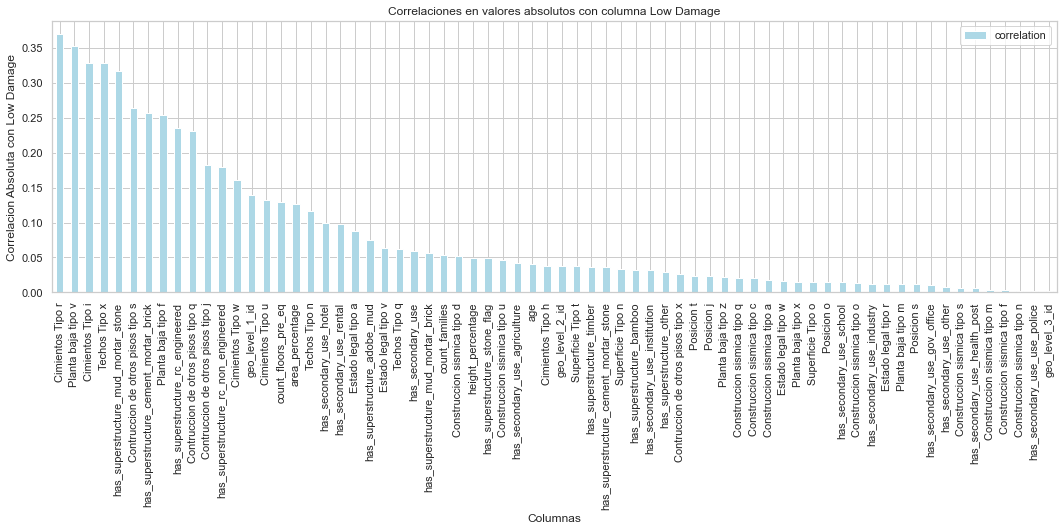

In [29]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = low_damage_correlation.abs()

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="lightblue")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con Low Damage")
ax.set_title("Correlaciones en valores absolutos con columna Low Damage")


Text(0.5, 1.0, 'Top 10Correlaciones en valores absolutos con columna Low Damage')

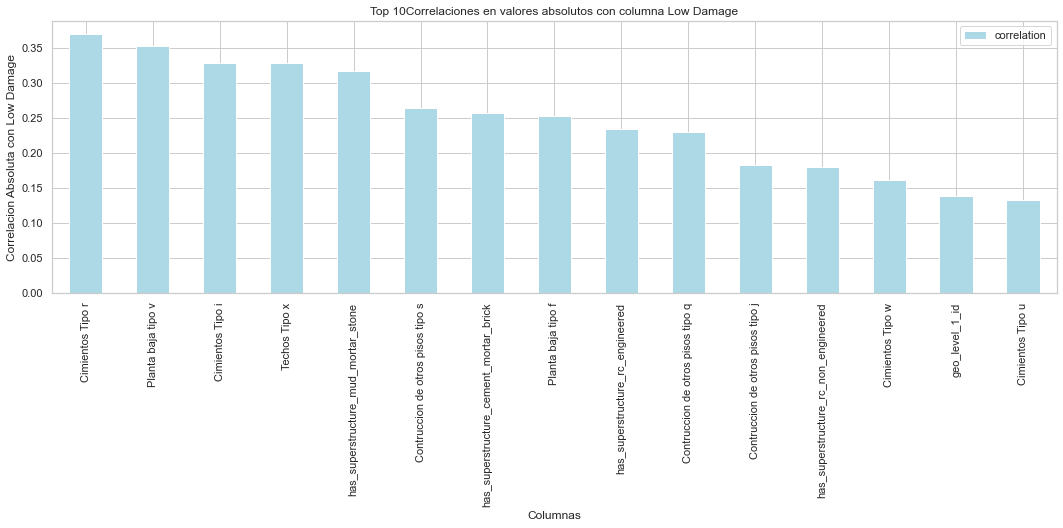

In [30]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = low_damage_correlation.abs().nlargest(15,"correlation")

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="lightblue")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con Low Damage")
ax.set_title("Top 10Correlaciones en valores absolutos con columna Low Damage")


In [31]:
#Correlacion entre Variable y Medium Damage

medium_damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    medium_correlation = data_corr[[col, 'Medium Damage']].corr()
    medium_damage_correlation.loc[len(medium_damage_correlation)] = [col, medium_correlation.min().min()]

medium_damage_correlation = medium_damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
medium_damage_correlation.abs().nlargest(20,"correlation")

,correlation
colum_name,
geo_level_1_id,0.08
Contruccion de otros pisos tipo q,0.07
Cimientos Tipo i,0.07
has_superstructure_rc_engineered,0.06
Contruccion de otros pisos tipo j,0.05
has_superstructure_mud_mortar_brick,0.05
Techos Tipo x,0.05
has_superstructure_timber,0.04
Techos Tipo n,0.04


Text(0.5, 1.0, 'Correlaciones en valores absolutos con columna Medium Damage')

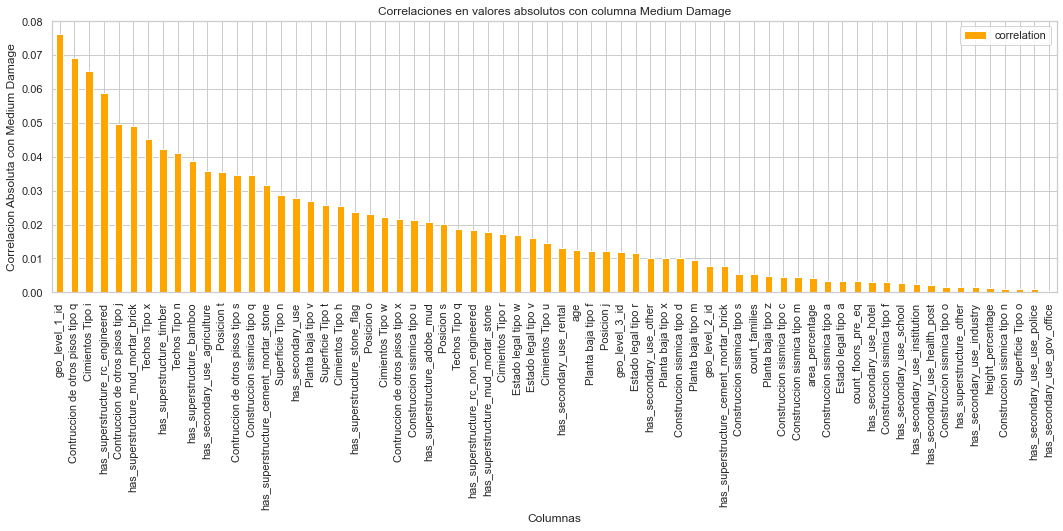

In [32]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = medium_damage_correlation.abs()

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="orange")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con Medium Damage")
ax.set_title("Correlaciones en valores absolutos con columna Medium Damage")

Text(0.5, 1.0, 'Top 10 Correlaciones en valores absolutos con columna Medium Damage')

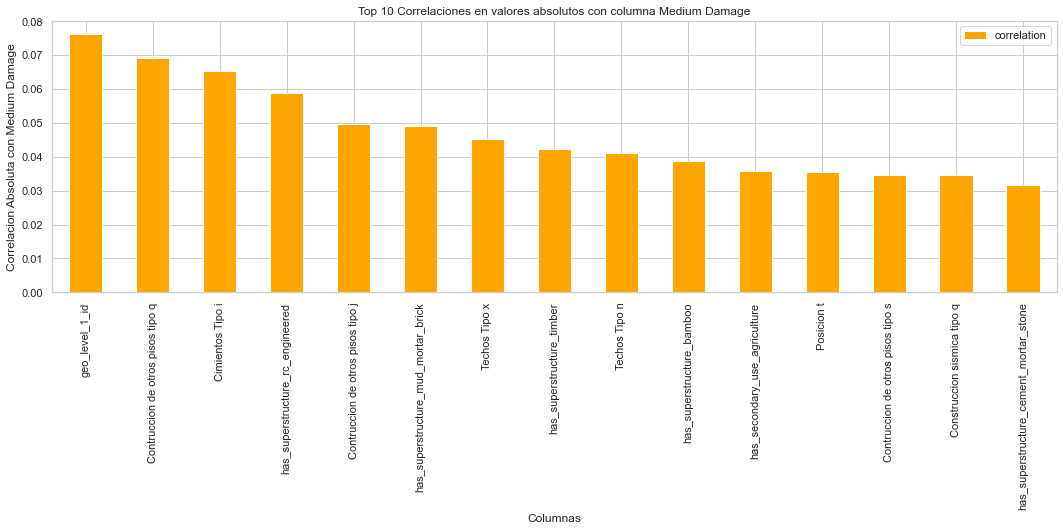

In [33]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = medium_damage_correlation.abs().nlargest(15,"correlation")

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="orange")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con Medium Damage")
ax.set_title("Top 10 Correlaciones en valores absolutos con columna Medium Damage")

In [34]:
#Correlacion entre Variables y High Damage
high_damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    high_correlation = data_corr[[col, 'High Damage']].corr()
    high_damage_correlation.loc[len(high_damage_correlation)] = [col, high_correlation.min().min()]

high_damage_correlation = high_damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
high_damage_correlation.abs().nlargest(20,"correlation")

,correlation
colum_name,
Cimientos Tipo r,0.21
Planta baja tipo v,0.19
has_superstructure_mud_mortar_stone,0.18
has_superstructure_cement_mortar_brick,0.17
Techos Tipo x,0.16
Planta baja tipo f,0.15
Cimientos Tipo i,0.14
Contruccion de otros pisos tipo s,0.13
Cimientos Tipo w,0.12


Text(0.5, 1.0, 'Correlaciones en valores absolutos con columna High Damage')

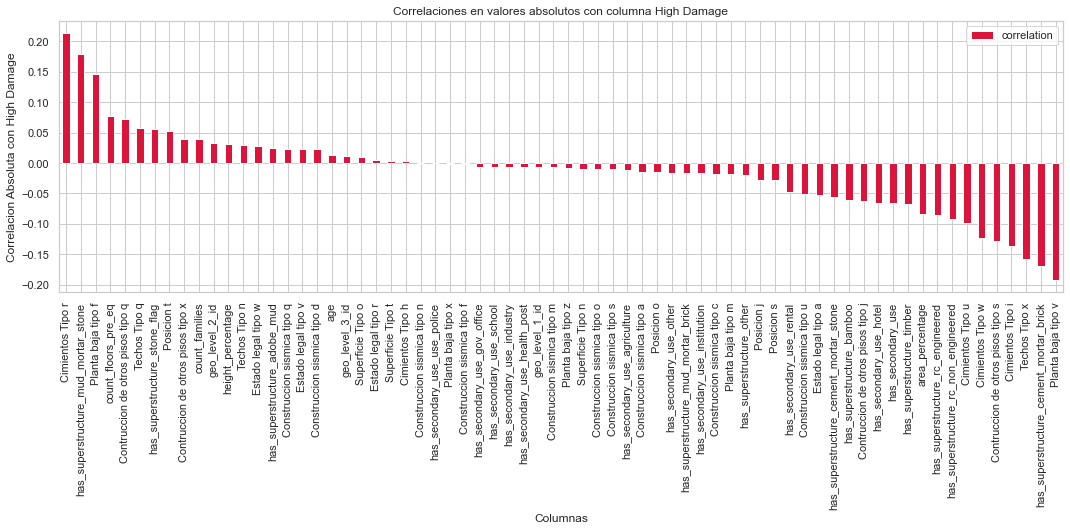

In [35]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = high_damage_correlation

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="crimson")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con High Damage")
ax.set_title("Correlaciones en valores absolutos con columna High Damage")

Text(0.5, 1.0, 'Top 10 Correlaciones en valores absolutos con columna High Damage')

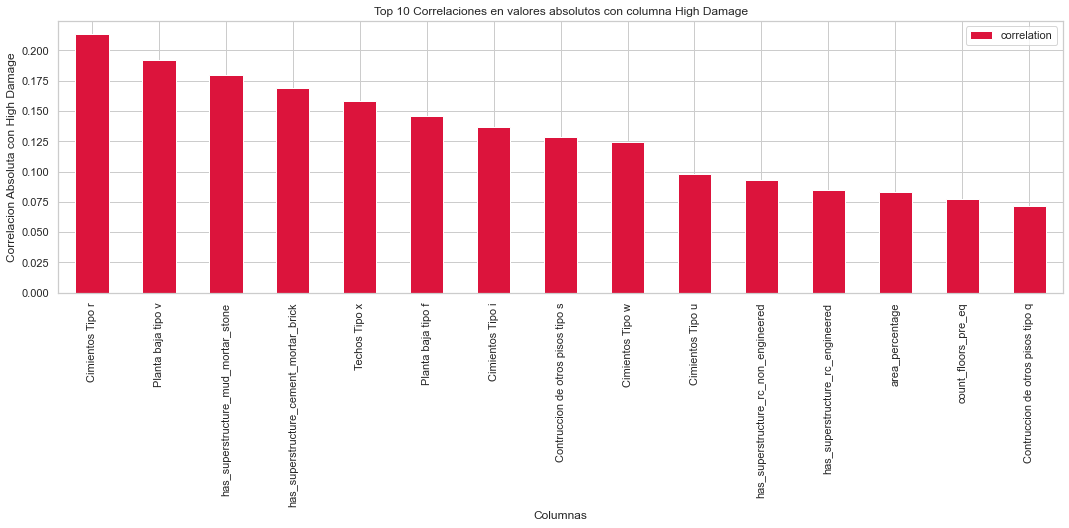

In [36]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = high_damage_correlation.abs().nlargest(15,"correlation")

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="crimson")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta con High Damage")
ax.set_title("Top 10 Correlaciones en valores absolutos con columna High Damage")

In [37]:
#Damage grade en general
columns_for_correlation = data_corr.columns.to_list()
columns_for_correlation.remove('building_id')
columns_for_correlation.remove('Low Damage')
columns_for_correlation.remove('Medium Damage')
columns_for_correlation.remove('High Damage')
columns_for_correlation.remove('damage_grade')

In [38]:
data = data_corr
data['damage_grade'] = data['damage_grade'].astype('int8')
damage_correlation = pd.DataFrame(columns=['colum_name', 'correlation'])
for col in columns_for_correlation:
    correlation = data[[col, 'damage_grade']].corr()
    damage_correlation.loc[len(damage_correlation)] = [col, correlation.min().min()]
damage_correlation = damage_correlation.set_index('colum_name').sort_values(by='correlation', ascending=False)
damage_correlation.head(10)

,correlation
colum_name,
Cimientos Tipo r,0.34
has_superstructure_mud_mortar_stone,0.29
Planta baja tipo f,0.23
Contruccion de otros pisos tipo q,0.17
count_floors_pre_eq,0.12
Techos Tipo n,0.08
Techos Tipo q,0.07
has_superstructure_stone_flag,0.07
count_families,0.06


Text(0.5, 1.0, "Correlaciones en valores absolutos con columna 'damage_grade'")

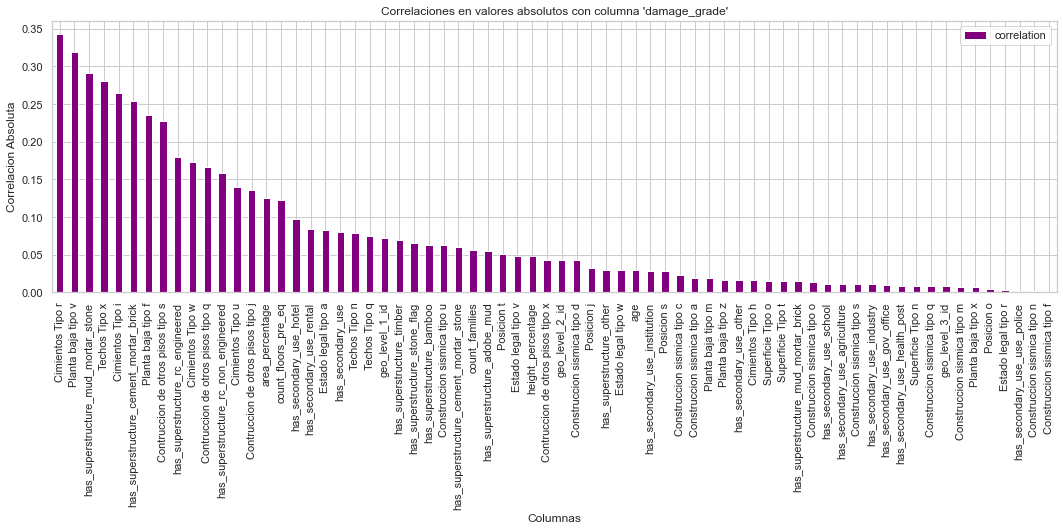

In [39]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]

absolute_damage_correlation = damage_correlation.abs()

ax = absolute_damage_correlation.sort_values(by='correlation', ascending=False).plot.bar(color="purple")
ax.set_xlabel("Columnas")
ax.set_ylabel("Correlacion Absoluta")
ax.set_title("Correlaciones en valores absolutos con columna 'damage_grade'")

Text(0.5, 1.0, "Top 10 correlaciones en valores absolutos con columna 'damage_grade'")

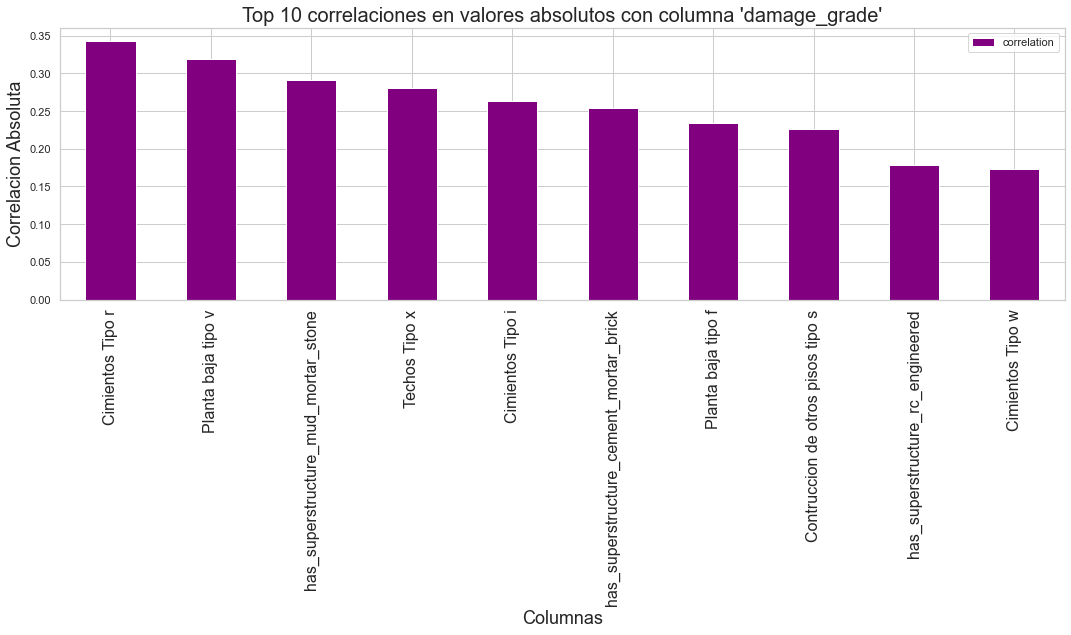

In [40]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 5]
plt.rc('xtick', labelsize=16)

absolute_damage_correlation_top_10 = damage_correlation.abs().nlargest(10, 'correlation')

ax = absolute_damage_correlation_top_10.sort_values(by='correlation', ascending=False).plot.bar(color="purple")
ax.set_xlabel("Columnas", fontsize=18)
ax.set_ylabel("Correlacion Absoluta", fontsize=18)
ax.set_title("Top 10 correlaciones en valores absolutos con columna 'damage_grade'", fontsize=20)

# Analisis de los features

Dado que contamos con muchas columnas, vamos a investigar los features mas interesantes y representativos para nuestro modelo, asi reducimos las chandes de overfitting.

In [72]:
data_train['damage_grade'] = data['damage_grade'].astype('int8')
features= data_train

In [44]:
data_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,False,False,False,False,False,False,False,2


## building_id (tipo: ID) ❌
   - identificador único de la edificación.

Debido a que este es un identificador unico para cada edificacion, y es independiente del daño de cada edificio, no lo tendremos cuenta para entrenar nuestro modelo.

## geo_level_1_id, geo_level_2_id, geo_level_3_id (tipo: enteros) ❌
 - región geográfica en la cual la edificación existe, desde la más general (level 1) a la más específica (level 3).
 
 * level 1: 0-30, 
 * level 2: 0-1427, 
 * level 3: 0-12567.
 

In [47]:
data_train["geo_level_absolute"] = data_train["geo_level_1_id"] + data_train["geo_level_2_id"] + data_train["geo_level_3_id"]

In [48]:
data_train["geo_level_absolute"].value_counts()

698      651
9198     647
799      542
11505    514
11311    487
        ... 
3806       1
13616      1
11857      1
11903      1
12502      1
Name: geo_level_absolute, Length: 7721, dtype: int64

Debido a que el objetivo de este trabajo es predecir el grado de daño que puede recibir un edificio en funcion de las caracteristicas propias de este, no vamos a tener en cuenta su localizacion, ya que si bien es logico que entre mas cerca del epicentro se encuentra el edificio mas probabilidad hay que sufra daño, no podemos saber en que lugares acontecera el proximo terremoto, tener en cuenta esto podria significar un leak al target.

## count_floors_pre_eq (tipo: entero) ✔️
   - número de pisos en la edificación antes del terremoto.

In [49]:
data_train["count_floors_pre_eq"].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [52]:
data_train[["count_floors_pre_eq", 'damage_grade']].corr()

,count_floors_pre_eq,damage_grade
count_floors_pre_eq,1.00,0.12
damage_grade,0.12,1.00


## age (tipo: entero) ❌
   - antigüedad de la edificación en años.

In [53]:
data_train["age"].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [54]:
data_train[["age", 'damage_grade']].corr()

,age,damage_grade
age,1.00,0.03
damage_grade,0.03,1.00


Por el analisis realizado en el tp1, vimos que esta columna tiene una distribucion muy poco uniforme, y no permite obtener conlusiones precisas, dejarla podria llevar al overfiting. Ademas tiene una correlacion muy baja con el grado de daño. Vamos a dropearla.

## area_percentage (tipo: entero) ✔️
   - superficie normalizada ocupada por la edificación.

In [55]:
data_train["area_percentage"].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

In [56]:
data_train[["area_percentage", 'damage_grade']].corr()

,area_percentage,damage_grade
area_percentage,1.00,-0.13
damage_grade,-0.13,1.00


## height_percentage (tipo: entero)
   - altura normalizada ocupada por la edificación.

In [57]:
data_train["height_percentage"].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

In [58]:
data_train[["height_percentage", 'damage_grade']].corr()

,height_percentage,damage_grade
height_percentage,1.00,0.05
damage_grade,0.05,1.00


## land_surface_condition (tipo: categórico)
 - condición de la superficie terrestre donde el edificio fue construido. Valores posibles: n, o, t.

In [67]:
data_train["land_surface_condition"].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [80]:
#Vamos a realizar un mean encoding de esta columna
t = (data_train["land_surface_condition"] == "t")
n = (data_train["land_surface_condition"] == "n")
o = (data_train["land_surface_condition"] == "o")
features.groupby(["damage_grade"]).mean()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,geo_level_absolute
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,"527,141.33",17.32,652.93,"6,278.00",1.84,17.32,9.72,5.15,0.02,0.35,...,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,"6,948.25"
2,"524,830.46",13.37,698.23,"6,219.95",2.13,27.34,8.03,5.43,0.09,0.77,...,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,"6,931.56"
3,"526,689.66",13.82,719.77,"6,316.54",2.21,27.82,7.50,5.52,0.10,0.87,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,050.14"


In [98]:
features["contador"] = 1
features.groupby(["damage_grade","land_surface_condition"])["contador"].sum()

damage_grade  land_surface_condition
1             n                           2556
              o                            602
              t                          21966
2             n                          21484
              o                           4708
              t                         122067
3             n                          11488
              o                           3006
              t                          72724
Name: contador, dtype: int64

In [175]:
land_dummies = pd.get_dummies(features["land_surface_condition"])


,n,o,t
n,1.00,-0.07,-0.88
o,-0.07,1.00,-0.40
t,-0.88,-0.40,1.00


## foundation_type (tipo: categórico)
 - tipo de cimientos usados cuando se construyó la edificación. Valores posibles: h, i, r, u, w.

## roof_type (tipo: categórico)
 - tipo de techo usado cuando se construyó la edificación. Valores posibles: n, q, x.

## ground_floor_type (tipo: categórico)
 - tipo de construcción usado en la planta baja cuando se construyó la edificación. Valores posibles: f, m, v, x, z.

## other_floor_type (tipo: categorical)
- tipo de construcción usado en otros pisos cuando se construyó la edificación (exceptuando el techo). Posibles valores: j, q, s, x.

## position (tipo: categórico)
 - orientación de la edificación. Posibles valores: j, o, s, t.

## plan_configuration (tipo: categórico)
  - formato de construcción de la edificación (para diseño sísmico). Valores posibles: a, c, d, f, m, n, o, q, s, u.

## has_superstructure_adobe_mud (tipo: binario)
- variable que indica si la edificación fue construida con adobe/barro.

In [99]:
data_train["has_superstructure_adobe_mud"].value_counts()

False    237500
True      23101
Name: has_superstructure_adobe_mud, dtype: int64

In [100]:
features.groupby(["damage_grade","has_superstructure_adobe_mud"])["contador"].sum()

damage_grade  has_superstructure_adobe_mud
1             False                            24530
              True                               594
2             False                           134357
              True                             13902
3             False                            78613
              True                              8605
Name: contador, dtype: int64

In [101]:
data_train[["has_superstructure_adobe_mud", 'damage_grade']].corr()

,has_superstructure_adobe_mud,damage_grade
has_superstructure_adobe_mud,1.00,0.06
damage_grade,0.06,1.00


## has_superstructure_mud_mortar_stone (tipo: binario) ✔️
- variable que indica si la edificación fue construida con barro - piedra.

In [102]:
data_train["has_superstructure_mud_mortar_stone"].value_counts()

True     198561
False     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [104]:
features.groupby(["damage_grade","has_superstructure_mud_mortar_stone"])["contador"].sum()

damage_grade  has_superstructure_mud_mortar_stone
1             False                                   16364
              True                                     8760
2             False                                   34312
              True                                   113947
3             False                                   11364
              True                                    75854
Name: contador, dtype: int64

In [106]:
data_train[["has_superstructure_mud_mortar_stone", 'damage_grade']].corr()

,has_superstructure_mud_mortar_stone,damage_grade
has_superstructure_mud_mortar_stone,1.00,0.29
damage_grade,0.29,1.00


## has_superstructure_stone_flag (tipo: binario)
 - variable que indica si la edificación fue construida con piedra.

In [107]:
data_train["has_superstructure_stone_flag"].value_counts()

False    251654
True       8947
Name: has_superstructure_stone_flag, dtype: int64

In [108]:
features.groupby(["damage_grade","has_superstructure_stone_flag"])["contador"].sum()

damage_grade  has_superstructure_stone_flag
1             False                             24942
              True                                182
2             False                            143725
              True                               4534
3             False                             82987
              True                               4231
Name: contador, dtype: int64

In [109]:
data_train[["has_superstructure_stone_flag", 'damage_grade']].corr()

,has_superstructure_stone_flag,damage_grade
has_superstructure_stone_flag,1.00,0.07
damage_grade,0.07,1.00


## has_superstructure_cement_mortar_stone (tipo: binario)
 - variable que indica si la edificación fue construida con cemento - piedra.

In [110]:
data_train["has_superstructure_cement_mortar_stone"].value_counts()

False    255849
True       4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [111]:
features.groupby(["damage_grade","has_superstructure_cement_mortar_stone"])["contador"].sum()

damage_grade  has_superstructure_cement_mortar_stone
1             False                                      24295
              True                                         829
2             False                                     145011
              True                                        3248
3             False                                      86543
              True                                         675
Name: contador, dtype: int64

In [112]:
data_train[["has_superstructure_cement_mortar_stone", 'damage_grade']].corr()

,has_superstructure_cement_mortar_stone,damage_grade
has_superstructure_cement_mortar_stone,1.00,-0.06
damage_grade,-0.06,1.00


## has_superstructure_mud_mortar_brick (tipo: binario) ❌
 - variable que indica si la edificación fue construida con barro - ladrillos.

In [113]:
data_train["has_superstructure_mud_mortar_brick"].value_counts()

False    242840
True      17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [114]:
features.groupby(["damage_grade","has_superstructure_mud_mortar_brick"])["contador"].sum()

damage_grade  has_superstructure_mud_mortar_brick
1             False                                   24501
              True                                      623
2             False                                  136561
              True                                    11698
3             False                                   81778
              True                                     5440
Name: contador, dtype: int64

In [115]:
data_train[["has_superstructure_mud_mortar_brick", 'damage_grade']].corr()

,has_superstructure_mud_mortar_brick,damage_grade
has_superstructure_mud_mortar_brick,1.00,0.01
damage_grade,0.01,1.00


## has_superstructure_cement_mortar_brick (tipo: binario) ✔️
 - variable que indica si la edificación fue construida con cemento - ladrillos.

In [117]:
data_train["has_superstructure_cement_mortar_brick"].value_counts()

False    240986
True      19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [118]:
features.groupby(["damage_grade","has_superstructure_cement_mortar_brick"])["contador"].sum()

damage_grade  has_superstructure_cement_mortar_brick
1             False                                      18019
              True                                        7105
2             False                                     136838
              True                                       11421
3             False                                      86129
              True                                        1089
Name: contador, dtype: int64

In [116]:
data_train[["has_superstructure_cement_mortar_brick", 'damage_grade']].corr()

,has_superstructure_cement_mortar_brick,damage_grade
has_superstructure_cement_mortar_brick,1.00,-0.25
damage_grade,-0.25,1.00


## has_superstructure_timber (tipo: binario)
 - variable que indica si la edificación fue construida con Timber (madera específica para la construcción).

In [119]:
data_train["has_superstructure_timber"].value_counts()

False    194151
True      66450
Name: has_superstructure_timber, dtype: int64

In [120]:
features.groupby(["damage_grade","has_superstructure_timber"])["contador"].sum()

damage_grade  has_superstructure_timber
1             False                         17482
              True                           7642
2             False                        108072
              True                          40187
3             False                         68597
              True                          18621
Name: contador, dtype: int64

In [121]:
data_train[["has_superstructure_timber", 'damage_grade']].corr()

,has_superstructure_timber,damage_grade
has_superstructure_timber,1.00,-0.07
damage_grade,-0.07,1.00


## has_superstructure_bamboo (tipo: binario)
 - variable que indica si la edificación fue construida con Bambú (caña).

In [122]:
data_train["has_superstructure_bamboo"].value_counts()

False    238447
True      22154
Name: has_superstructure_bamboo, dtype: int64

In [123]:
features.groupby(["damage_grade","has_superstructure_bamboo"])["contador"].sum()

damage_grade  has_superstructure_bamboo
1             False                         22285
              True                           2839
2             False                        134258
              True                          14001
3             False                         81904
              True                           5314
Name: contador, dtype: int64

In [124]:
data_train[["has_superstructure_bamboo", 'damage_grade']].corr()

,has_superstructure_bamboo,damage_grade
has_superstructure_bamboo,1.00,-0.06
damage_grade,-0.06,1.00


## has_superstructure_rc_non_engineered (tipo: binario) ✔️
 - variable que indica si la edificación fue construida con concreto reforzado no-diseñado.

In [125]:
data_train["has_superstructure_rc_non_engineered"].value_counts()

False    249502
True      11099
Name: has_superstructure_rc_non_engineered, dtype: int64

In [126]:
features.groupby(["damage_grade","has_superstructure_rc_non_engineered"])["contador"].sum()

damage_grade  has_superstructure_rc_non_engineered
1             False                                    21267
              True                                      3857
2             False                                   142427
              True                                      5832
3             False                                    85808
              True                                      1410
Name: contador, dtype: int64

In [127]:
data_train[["has_superstructure_rc_non_engineered", 'damage_grade']].corr()

,has_superstructure_rc_non_engineered,damage_grade
has_superstructure_rc_non_engineered,1.00,-0.16
damage_grade,-0.16,1.00


## has_superstructure_rc_engineered (tipo: binario) ✔️
- variable que indica si la edificación fue construida con concreto reforzado diseñado.

In [128]:
data_train["has_superstructure_rc_engineered"].value_counts()

False    256468
True       4133
Name: has_superstructure_rc_engineered, dtype: int64

In [129]:
features.groupby(["damage_grade","has_superstructure_rc_engineered"])["contador"].sum()

damage_grade  has_superstructure_rc_engineered
1             False                                22468
              True                                  2656
2             False                               146857
              True                                  1402
3             False                                87143
              True                                    75
Name: contador, dtype: int64

In [130]:
data_train[["has_superstructure_rc_engineered", 'damage_grade']].corr()

,has_superstructure_rc_engineered,damage_grade
has_superstructure_rc_engineered,1.00,-0.18
damage_grade,-0.18,1.00


## has_superstructure_other (tipo: binario)  ❌
- variable que indica si la edificación fue construida con otro material.

In [131]:
data_train["has_superstructure_other"].value_counts()

False    256696
True       3905
Name: has_superstructure_other, dtype: int64

In [132]:
features.groupby(["damage_grade","has_superstructure_other"])["contador"].sum()

damage_grade  has_superstructure_other
1             False                        24468
              True                           656
2             False                       146011
              True                          2248
3             False                        86217
              True                          1001
Name: contador, dtype: int64

In [133]:
data_train[["has_superstructure_other", 'damage_grade']].corr()

,has_superstructure_other,damage_grade
has_superstructure_other,1.00,-0.03
damage_grade,-0.03,1.00


Poca informacion, descartada

## legal_ownership_status (tipo: categórico)
 - estado legal de la tierra donde la edificación fue construida. Valores posibles: a, r, v, w.

## count_families (tipo: entero) ❌
  - número de familias que vivían en la edificación.

In [168]:
data_train["count_families"].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [169]:
data_train[["count_families", 'damage_grade']].corr()

,count_families,damage_grade
count_families,1.00,0.06
damage_grade,0.06,1.00


## has_secondary_use (tipo: binario) 
- variable que indica si la edificación era usada con un uso secundario.

In [135]:
data_train["has_secondary_use"].value_counts()

False    231445
True      29156
Name: has_secondary_use, dtype: int64

In [136]:
features.groupby(["damage_grade","has_secondary_use"])["contador"].sum()

damage_grade  has_secondary_use
1             False                 20876
              True                   4248
2             False                130544
              True                  17715
3             False                 80025
              True                   7193
Name: contador, dtype: int64

In [137]:
data_train[["has_secondary_use", 'damage_grade']].corr()

,has_secondary_use,damage_grade
has_secondary_use,1.00,-0.08
damage_grade,-0.08,1.00


## has_secondary_use_agriculture (tipo: binario) ❌
 - variable que indica si la edificación era usada con propósitos de agricultura.

In [138]:
data_train["has_secondary_use_agriculture"].value_counts()

False    243824
True      16777
Name: has_secondary_use_agriculture, dtype: int64

In [139]:
features.groupby(["damage_grade","has_secondary_use_agriculture"])["contador"].sum()

damage_grade  has_secondary_use_agriculture
1             False                             24295
              True                                829
2             False                            137580
              True                              10679
3             False                             81949
              True                               5269
Name: contador, dtype: int64

In [140]:
data_train[["has_secondary_use_agriculture", 'damage_grade']].corr()

,has_secondary_use_agriculture,damage_grade
has_secondary_use_agriculture,1.00,0.01
damage_grade,0.01,1.00


## has_secondary_use_hotel (tipo: binario)  ❌
 - variable que indica si la edificación era usada como oficina de gobierno.

In [141]:
data_train["has_secondary_use_hotel"].value_counts()

False    251838
True       8763
Name: has_secondary_use_hotel, dtype: int64

In [142]:
features.groupby(["damage_grade","has_secondary_use_hotel"])["contador"].sum()

damage_grade  has_secondary_use_hotel
1             False                       22908
              True                         2216
2             False                      143201
              True                         5058
3             False                       85729
              True                         1489
Name: contador, dtype: int64

In [143]:
data_train[["has_secondary_use_hotel", 'damage_grade']].corr()

,has_secondary_use_hotel,damage_grade
has_secondary_use_hotel,1.00,-0.10
damage_grade,-0.10,1.00


## has_secondary_use_rental (tipo: binario) ❌
 - variable que indica si la edificación se alquilaba.

In [144]:
data_train["has_secondary_use_rental"].value_counts()

False    258490
True       2111
Name: has_secondary_use_rental, dtype: int64

In [145]:
features.groupby(["damage_grade","has_secondary_use_rental"])["contador"].sum()

damage_grade  has_secondary_use_rental
1             False                        24247
              True                           877
2             False                       147208
              True                          1051
3             False                        87035
              True                           183
Name: contador, dtype: int64

In [146]:
data_train[["has_secondary_use_rental", 'damage_grade']].corr()

,has_secondary_use_rental,damage_grade
has_secondary_use_rental,1.00,-0.08
damage_grade,-0.08,1.00


Pocos datos, descartado

## has_secondary_use_institution (tipo: binario) ❌
 - variable que indica si la edificación era usada como sede de una institución.

In [147]:
data_train["has_secondary_use_institution"].value_counts()

False    260356
True        245
Name: has_secondary_use_institution, dtype: int64

In [148]:
features.groupby(["damage_grade","has_secondary_use_institution"])["contador"].sum()

damage_grade  has_secondary_use_institution
1             False                             25025
              True                                 99
2             False                            148130
              True                                129
3             False                             87201
              True                                 17
Name: contador, dtype: int64

In [149]:
data_train[["has_secondary_use_institution", 'damage_grade']].corr()

,has_secondary_use_institution,damage_grade
has_secondary_use_institution,1.00,-0.03
damage_grade,-0.03,1.00


## has_secondary_use_school (tipo: binario) ❌
- variable que indica si la edificación era usada como escuela.

In [150]:
data_train["has_secondary_use_school"].value_counts()

False    260507
True         94
Name: has_secondary_use_school, dtype: int64

In [151]:
features.groupby(["damage_grade","has_secondary_use_school"])["contador"].sum()

damage_grade  has_secondary_use_school
1             False                        25094
              True                            30
2             False                       148212
              True                            47
3             False                        87201
              True                            17
Name: contador, dtype: int64

In [152]:
data_train[["has_secondary_use_school", 'damage_grade']].corr()

,has_secondary_use_school,damage_grade
has_secondary_use_school,1.00,-0.01
damage_grade,-0.01,1.00


## has_secondary_use_industry (tipo: binario) ❌
- variable que indica si la edificación era usada con propósitos industriales.

In [153]:
data_train["has_secondary_use_industry"].value_counts()

False    260322
True        279
Name: has_secondary_use_industry, dtype: int64

In [154]:
features.groupby(["damage_grade","has_secondary_use_industry"])["contador"].sum()

damage_grade  has_secondary_use_industry
1             False                          25065
              True                              59
2             False                         148107
              True                             152
3             False                          87150
              True                              68
Name: contador, dtype: int64

In [155]:
data_train[["has_secondary_use_industry", 'damage_grade']].corr()

,has_secondary_use_industry,damage_grade
has_secondary_use_industry,1.00,-0.01
damage_grade,-0.01,1.00


## has_secondary_use_health_post (tipo: binario) ❌
- variable que indica si la edificación era usada como puesto de salud.

In [156]:
data_train["has_secondary_use_health_post"].value_counts()

False    260552
True         49
Name: has_secondary_use_health_post, dtype: int64

In [157]:
features.groupby(["damage_grade","has_secondary_use_health_post"])["contador"].sum()

damage_grade  has_secondary_use_health_post
1             False                             25112
              True                                 12
2             False                            148227
              True                                 32
3             False                             87213
              True                                  5
Name: contador, dtype: int64

In [158]:
data_train[["has_secondary_use_health_post", 'damage_grade']].corr()

,has_secondary_use_health_post,damage_grade
has_secondary_use_health_post,1.00,-0.01
damage_grade,-0.01,1.00


## has_secondary_use_gov_office (tipo: binario) ❌ 
- variable que indica si la edificación era usada como oficina de gobierno.

In [159]:
data_train["has_secondary_use_gov_office"].value_counts()

False    260563
True         38
Name: has_secondary_use_gov_office, dtype: int64

In [160]:
features.groupby(["damage_grade","has_secondary_use_gov_office"])["contador"].sum()

damage_grade  has_secondary_use_gov_office
1             False                            25111
              True                                13
2             False                           148238
              True                                21
3             False                            87214
              True                                 4
Name: contador, dtype: int64

In [161]:
data_train[["has_secondary_use_gov_office", 'damage_grade']].corr()

,has_secondary_use_gov_office,damage_grade
has_secondary_use_gov_office,1.00,-0.01
damage_grade,-0.01,1.00


## has_secondary_use_use_police (tipo: binario) ❌
- variable que indica si la edificación era usada como estación de policía.

In [162]:
data_train["has_secondary_use_use_police"].value_counts()

False    260578
True         23
Name: has_secondary_use_use_police, dtype: int64

In [163]:
features.groupby(["damage_grade","has_secondary_use_use_police"])["contador"].sum()

damage_grade  has_secondary_use_use_police
1             False                            25120
              True                                 4
2             False                           148247
              True                                12
3             False                            87211
              True                                 7
Name: contador, dtype: int64

In [164]:
data_train[["has_secondary_use_use_police", 'damage_grade']].corr()

,has_secondary_use_use_police,damage_grade
has_secondary_use_use_police,1.00,-0.00
damage_grade,-0.00,1.00


## has_secondary_use_other (tipo: binario) ❌
- variable que indica si la edificación era usada con otro uso secundario

In [165]:
data_train["has_secondary_use_other"].value_counts()

False    259267
True       1334
Name: has_secondary_use_other, dtype: int64

In [166]:
features.groupby(["damage_grade","has_secondary_use_other"])["contador"].sum()

damage_grade  has_secondary_use_other
1             False                       24949
              True                          175
2             False                      147407
              True                          852
3             False                       86911
              True                          307
Name: contador, dtype: int64

In [167]:
data_train[["has_secondary_use_other", 'damage_grade']].corr()

,has_secondary_use_other,damage_grade
has_secondary_use_other,1.00,-0.02
damage_grade,-0.02,1.00
